**Load Audio**

In [ ]:
import os
import scipy
from scipy.io import wavfile
from scipy.io.wavfile import read
import scipy.fftpack as fft
from scipy.signal import get_window
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import IPython.display as ipd
%matplotlib inline

In [ ]:
#path audio (upload audio anda dan sesuaikan dengan nama audio anda)
#disini saya menggunakan suara anjing
#data train saya dapatkan di kaggle
#https://www.kaggle.com/c/freesound-audio-tagging/data?select=audio_train
audio_path = 'birdsong.wav'
#x = data audio
#sr = rate data audio
x, sr = librosa.load(audio_path)
#cek tipe data atau objek
print (type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


**Playing Audio**

In [ ]:
ipd.Audio(audio_path)

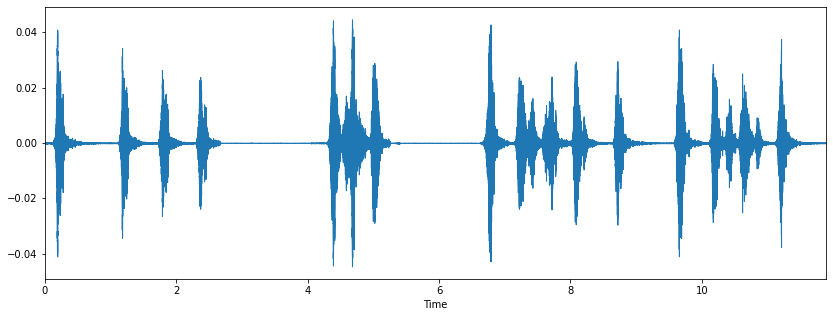

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

**Spectogram**

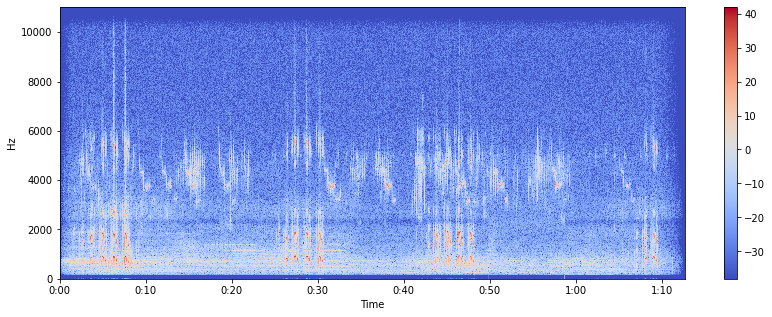

In [ ]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
plt.colorbar()

**Histogram Zero Crossing Rate**

Zero crossing rate tingkat perubahan tanda di sepanjang sinyal, yaitu, tingkat di mana sinyal berubah dari positif ke negatif atau kembali. Di sini saya akan memperbesar atau mencetak spektrum hanya untuk 100 kolom array

naik turun gelombang = [False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False  True False False
 False False False  True  True False False False False False  True False
 False False False False False False False False  True False False False
 False False  True False False False  True False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False  True False False
 False False False False]

jumlah naiknya gelombang = 10


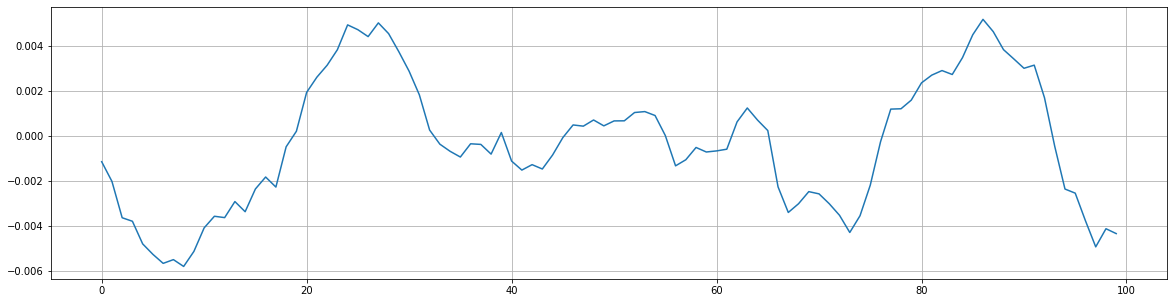

In [ ]:
#melihat naik turunnya gelombang
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()
#mendapatkan nilai zero crossing
zero_crossings =librosa.zero_crossings(x[n0:n1], pad=False)

#print naik turun gelombang
print("naik turun gelombang = {}".format(zero_crossings))
print()
#print jumlah naiknya gelombang
print("jumlah naiknya gelombang = {}".format(sum(zero_crossings)))

**Histogram Energy**

Energi yang berasal dari suatu sinyal sesuai dengan besarnya total sinyal. Untuk sinyal audio, itu secara kasar sesuai dengan seberapa keras sinyalnya.

In [ ]:
hop_length = 512 #panjang lompatan
frame_length = 1024 #panjang frame
#n_fft = 1

energy = np.array([
    sum(abs(x[i:i+frame_length]**2))
    for i in range(0, len(x), hop_length)
])

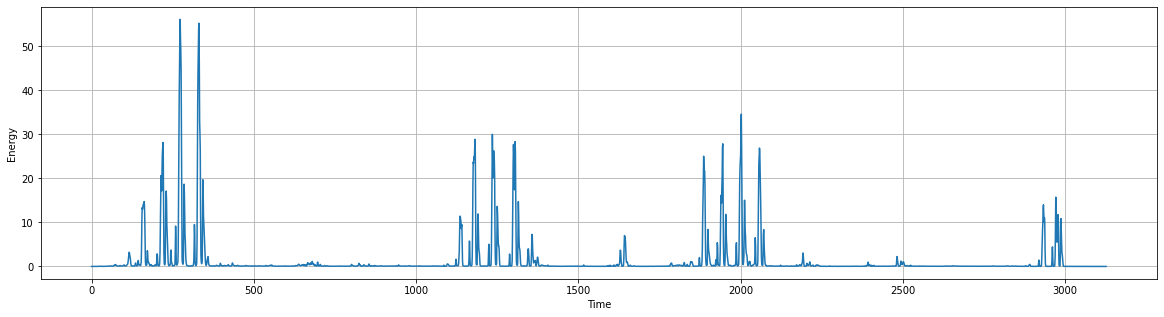

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(energy)
plt.ylabel('Energy')
plt.xlabel('Time')
plt.grid()

**Histogram Energy Entropy**

Dengan membagi setiap frame menjadi satu set sub-frame, kita dapat menghitung energi jangka pendek masing-masing dan memperlakukannya sebagai probabilitas, sehingga memungkinkan kita untuk menghitung entropinya.

In [ ]:
mu1 = 10
sigma1 = 10

s1 = np.random.normal(mu1, sigma1, 100000)
hist1 = np.histogram(s1, bins=50, range=(-10,10), density=True)
data = hist1[0]
ent = -(data*np.log(np.abs(data))).sum()
print (ent)

7.171175645915523


signal


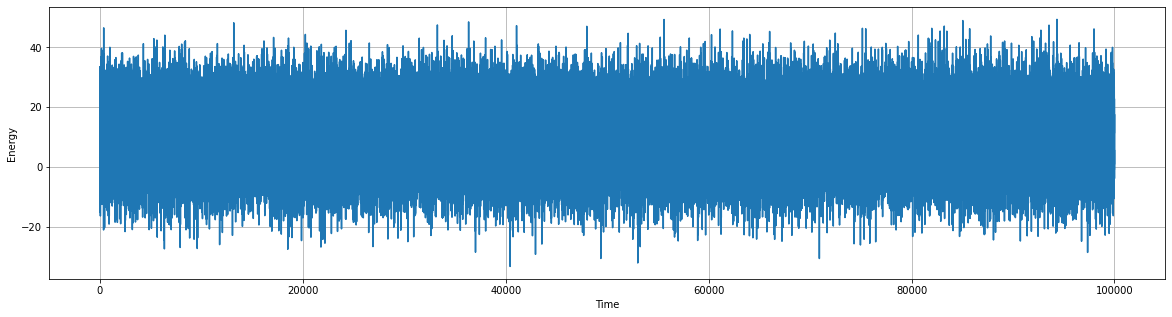

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(s1)
plt.ylabel('Energy')
plt.xlabel('Time')
plt.grid()
print("signal")


Energy Entropy Sequence


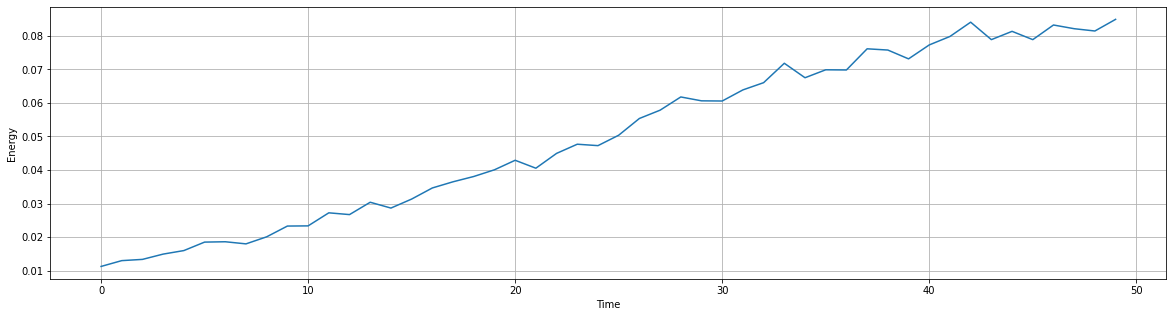

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(data)
plt.ylabel('Energy')
plt.xlabel('Time')
plt.grid()
print("Energy Entropy Sequence")

**MFCC (Mel-Frequency Cepstral Coefficient)**

**Load Audio**

In [ ]:
audio_path = 'birdsong.wav'
ipd.Audio(audio_path)

**Speech Signal**

In [ ]:
sample_rate, audio = wavfile.read(audio_path)
print("Sample rate: {0}Hz".format(sample_rate))
print("Audio duration: {0}s".format(len(audio) / sample_rate))

Sample rate: 32000Hz
Audio duration: 72.588625s


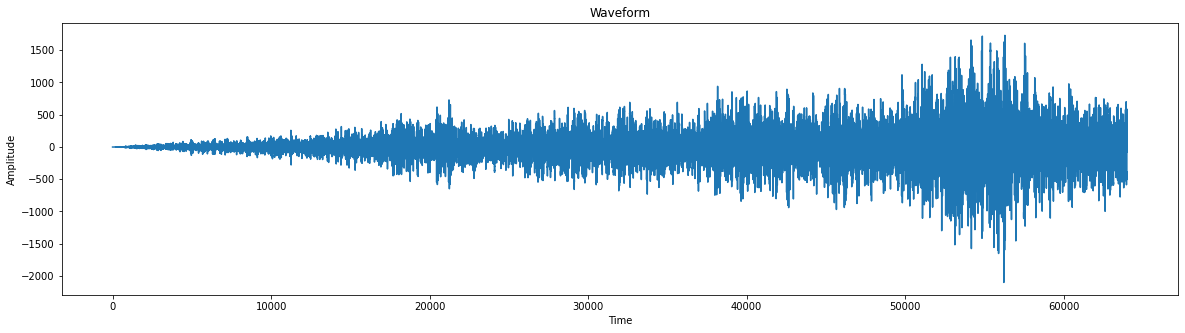

In [ ]:
# membaca sampel audio
input_data = read('birdsong.wav')

rate = input_data[0] # rate: samples/sec
data = input_data[1] # data: samples

# Plot semua sampel
time = 2 * rate
data = data[0:int(time)]
plt.figure(figsize=(20, 5))
plt.plot(data[0:])

# Label x-axis and y-axis 

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Waveform")

# Display the plot
plt.show()

**Normalisasi Audio**

In [ ]:
def normalize_audio(audio): #membuat fungsi normalisasi audio
    audio = audio / np.max(np.abs(audio))
    return audio

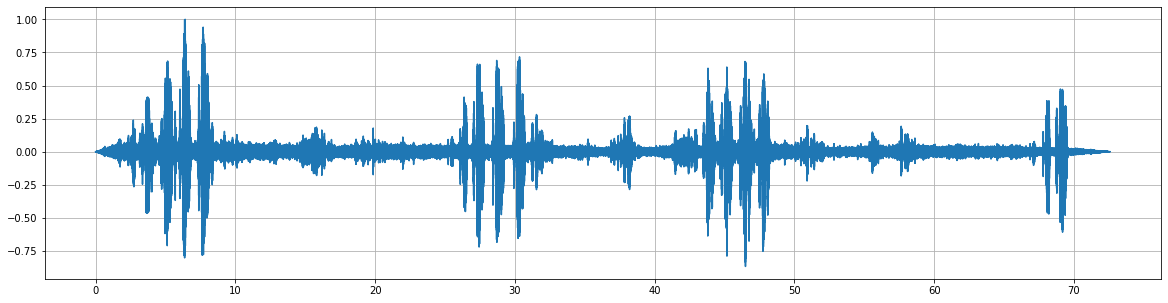

In [ ]:
audio = normalize_audio(audio)
plt.figure(figsize=(20,5))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

**Pre-Emphasis**

filter pre-emphasis berguna dalam beberapa cara: 

(1) menyeimbangkan spektrum frekuensi karena frekuensi tinggi biasanya memiliki besaran yang lebih kecil dibandingkan dengan frekuensi yang lebih rendah. 

(2) menghindari masalah numerik selama operasi transformasi Fourier dan, 

(3) juga dapat meningkatkan Sinyal- to-Noise Ratio (SNR).

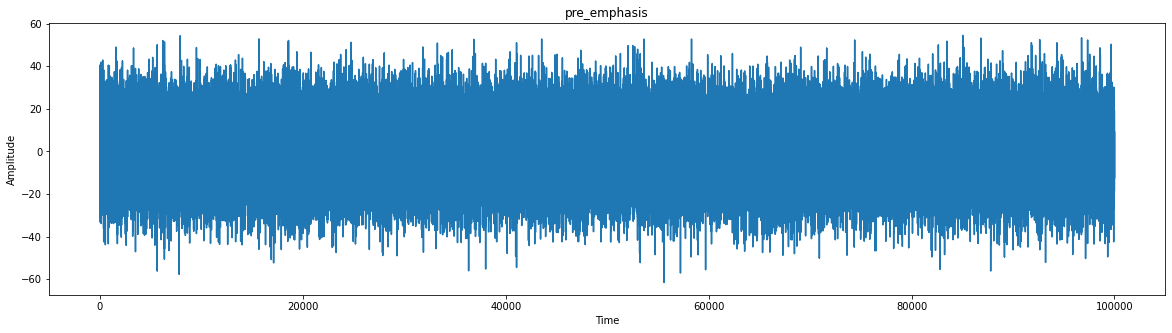

In [ ]:
data = s1[0:int(3.5 * sample_rate)] #pertahankan 3.5s pertama
pre_emphasis = 0.97 #nilai koefesien untuk filter
emphasized_signal = np.append(data[0], data[1:] - pre_emphasis * data[:-1])

# Plot all samples
plt.figure(figsize=(20, 5))
plt.plot(emphasized_signal[0:])

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("pre_emphasis")

# Display the plot
plt.show()

**Audio Framing**

Karena audio adalah proses non stasioner, FFT akan menghasilkan distorsi. Untuk mengatasi hal ini kita dapat mengasumsikan bahwa audio adalah proses diam dalam waktu yang singkat. Karena itu saya membagi sinyal menjadi bingkai pendek. Setiap bingkai audio akan memiliki ukuran yang sama dengan FFT. Juga saya ingin bingkai tumpang tindih. Saya melakukan itu sehingga bingkai akan memiliki korelasi di antara mereka dan karena saya kehilangan informasi di tepi setiap bingkai setelah menerapkan fungsi window.

In [ ]:
def frame_audio(audio, FFT_size=2048, hop_size=10, sample_rate=44100):
    # hop_size in ms
    
    audio = np.pad(audio, int(FFT_size / 2), mode='reflect')
    frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
    frame_num = int((len(audio) - FFT_size) / frame_len) + 1
    frames = np.zeros((frame_num,FFT_size))
    
    for n in range(frame_num):
        frames[n] = audio[n*frame_len:n*frame_len+FFT_size]
    
    return frames

In [ ]:
hop_size = 15 #ms
FFT_size = 2048

audio_framed = frame_audio(audio, FFT_size=FFT_size, hop_size=hop_size, sample_rate=sample_rate)
print("Framed audio shape: {0}".format(audio_framed.shape))

Framed audio shape: (4840, 2048)


In [ ]:
audio.shape

(2322836,)

In [ ]:
FFT_size=2048
hop_size=10
sample_rate=44100

np.pad(audio, int(FFT_size / 2), mode='reflect').shape

(2324884,)

In [ ]:
print("First frame:")
audio_framed[1]

First frame:


array([-0.00010993, -0.00021986, -0.00027483, ..., -0.00076953,
       -0.00071456, -0.00065959])

In [ ]:
print("Last frame:")
audio_framed[-1]

Last frame:


array([ 0.00000000e+00,  1.09932392e-04,  1.09932392e-04, ...,
       -5.49661958e-05,  0.00000000e+00, -5.49661958e-05])

**Windowing (Konversi ke domain frekuensi)**

Sekarang saya akan mengonversi audio, yang saat ini ada dalam time domain, ke frequency domain. FFT mengasumsikan audio menjadi berkala dan berlanjut. Dengan membingkai sinyal, memastikan audio menjadi berkala. Untuk membuat audio berlanjut, saya menerapkan fungsi window pada setiap frame. Jika saya tidak melakukan itu. Saya akan mendapatkan distorsi frekuensi tinggi. Untuk mengatasi hal ini, pertama-tama  perlu menerapkan fungsi jendela ke audio berbingkai dan kemudian menjalankan FFT. Window memastikan bahwa kedua ujung sinyal akan berakhir mendekati nol.
Memilih window yang benar itu sulit dan membutuhkan waktu. Untuk kesederhanaan saya akan memilih window "Hanning"

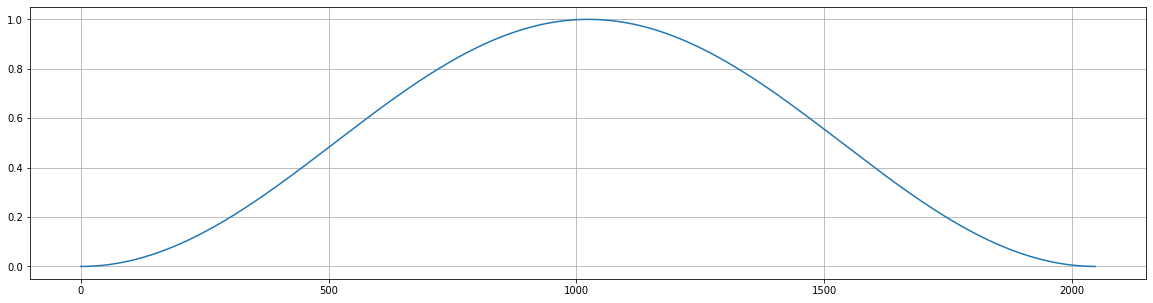

In [ ]:
window = get_window("hann", FFT_size, fftbins=True)
plt.figure(figsize=(20, 5))
plt.plot(window)
plt.grid(True)

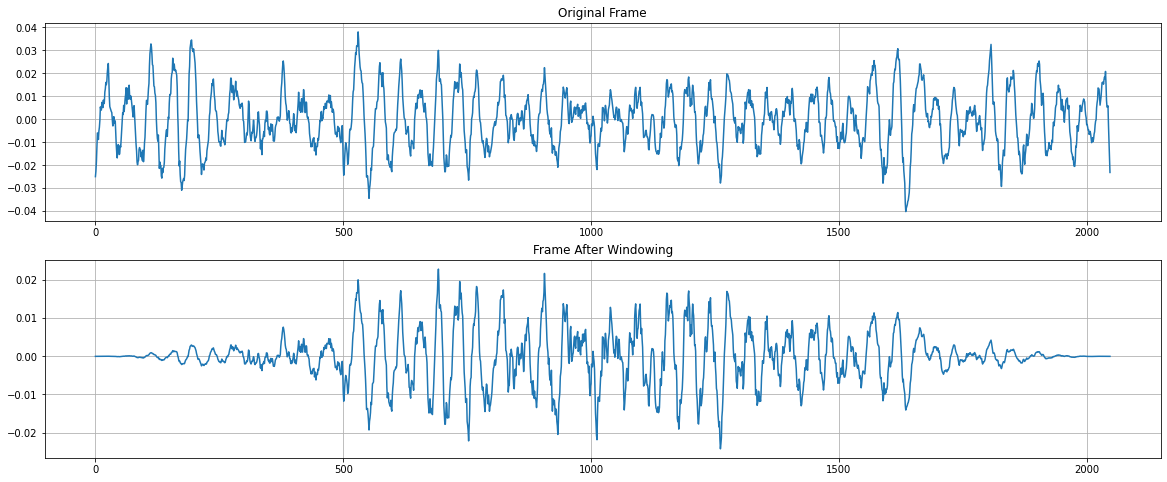

In [ ]:
audio_win = audio_framed * window

ind = 69
plt.figure(figsize=(20,8))
plt.subplot(2, 1, 1)
plt.plot(audio_framed[ind])
plt.title('Original Frame')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(audio_win[ind])
plt.title('Frame After Windowing')
plt.grid(True)

Pada plot di atas, kita dapat melihat bahwa kedua ujung bingkai berakhir di tempat yang berbeda pada sumbu y. Kita dapat melihat bahwa window membawa tepi setiap bingkai mendekati nol. Sekarang saya akan lakukan FFT. Setelah saya melakukan FFT, saya hanya mengambil bagian positif dari spektrum (first half +1).

In [ ]:
audio_winT = np.transpose(audio_win)

audio_fft = np.empty((int(1 + FFT_size // 2), audio_winT.shape[1]), dtype=np.complex64, order='F')

for n in range(audio_fft.shape[1]):
    audio_fft[:, n] = fft.fft(audio_winT[:, n], axis=0)[:audio_fft.shape[0]]

audio_fft = np.transpose(audio_fft)

**Calculate signal power**

In [ ]:
audio_power = np.square(np.abs(audio_fft))
print(audio_power.shape)

(4840, 1025)


**DFT (Discreate Fourier Transforms**

DFT mengubah urutan N sampel nyata atau kompleks yang berjarak sama x0, x1, .... xN – 1 dari fungsi x (t) waktu (atau variabel lain, tergantung pada aplikasinya) menjadi urutan bilangan kompleks N Xk dengan penjumlahan berikut:

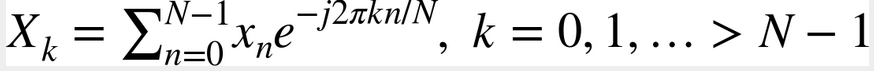

In [ ]:
time_space=np.linspace(0,1.5,1500)
x=3*np.cos(2*np.pi*20*time_space+0.2)+np.cos(2*np.pi*30*time_space-0.3)+2*np.cos(2*np.pi*40*time_space+2.4)
#print(x)
N=1500
y=np.zeros(N,dtype=np.complex)
freq=np.zeros(N)
#dft
for i in range(1500):
    for j in range(1500):
        y[i]=y[i]+ (x[j]*np.exp(-2j*np.pi*i*j/N))
                    
print(y)     

[2.42074879+0.j         2.42399525+0.04076788j 2.43377901+0.08172806j ...
 2.45023463-0.12307677j 2.43377901-0.08172806j 2.42399525-0.04076788j]


In [ ]:
#dft
def built():
        
    n=np.arange(1500)
    k=n.reshape((1500,1))
    m=np.exp(-2j*np.pi*k*n*(1/1500))
      

    print(np.dot(m,x)) 
built()
freq=time_space*0.67*1000
print(freq)

ymag=np.abs(y)
anglee=np.angle(y)

[2.42074879+0.j         2.42399525+0.04076788j 2.43377901+0.08172806j ...
 2.45023463-0.12307677j 2.43377901-0.08172806j 2.42399525-0.04076788j]
[0.00000000e+00 6.70446965e-01 1.34089393e+00 ... 1.00365911e+03
 1.00432955e+03 1.00500000e+03]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


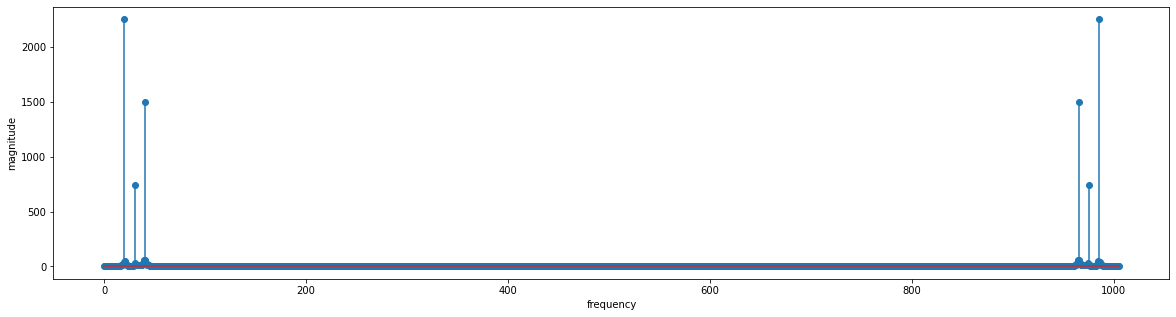

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


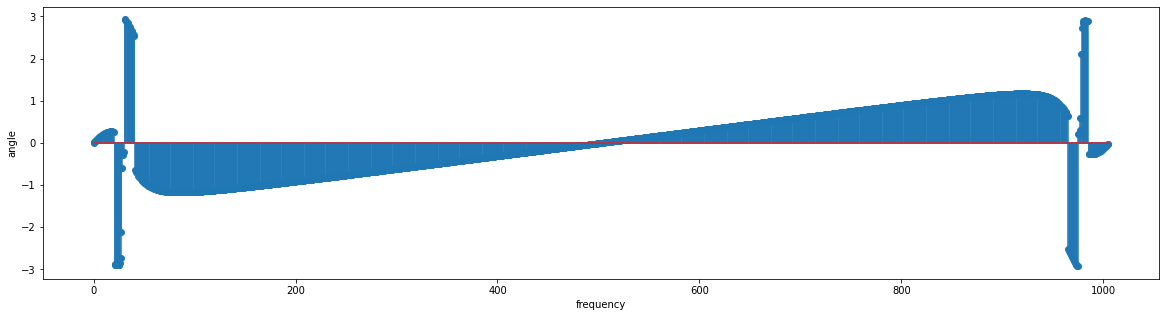

In [ ]:
#magnitude plot
plt.figure(figsize=(20, 5))
plt.stem(freq,ymag)
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.show()    

#phase plot
plt.figure(figsize=(20, 5))
plt.stem(freq,anglee)
plt.xlabel("frequency")
plt.ylabel("angle")
plt.show()

**Fourier Transform dan Power Spectrum**

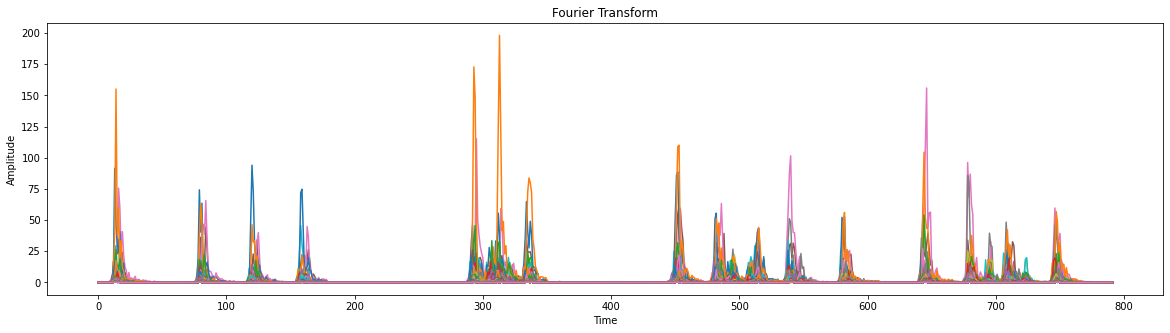

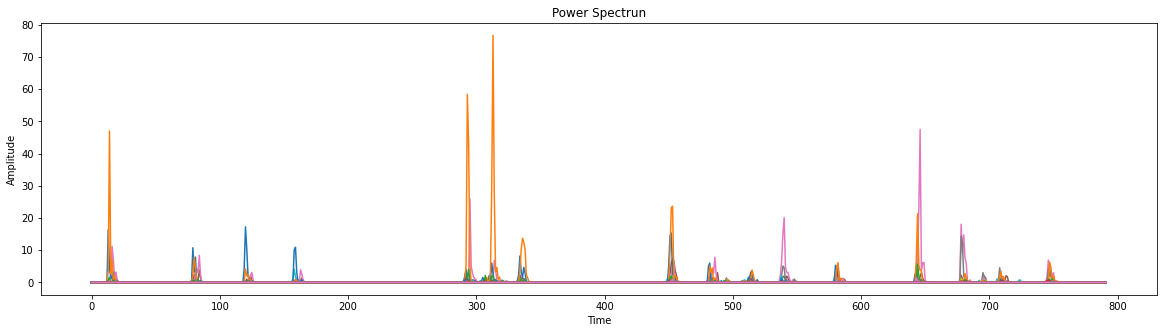

In [ ]:
NFFT = 512

mag_frames = np.absolute(np.fft.rfft(audio_framed, NFFT))  # Magnitude of the FFT

# Plot all samples
plt.figure(figsize=(20, 5))
plt.plot(mag_frames[0:])

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Fourier Transform")

# Display the plot
plt.show()

pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum

# Plot all samples
plt.figure(figsize=(20, 5))
plt.plot(pow_frames[0:])

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Power Spectrun")

# Display the plot
plt.show()

**MEL-spaced filterbank**

Di sini saya menghitung MEL-spaced filterbank dan kemudian meneruskan audio berbingkai melalui space filterbank tersebut. Dengan demikian kita mendapatkan informasi tentang kekuatan di setiap pita frekuensi. Filter dapat dibuat untuk pita frekuensi apa pun.

In [ ]:
freq_min = 0
freq_high = sample_rate / 2
mel_filter_num = 10

print("Minimum frequency: {0}".format(freq_min))
print("Maximum frequency: {0}".format(freq_high))

Minimum frequency: 0
Maximum frequency: 22050.0



**Menghitung filter points**

Pertama saya membangun titik filter yang menentukan awal dan penghentian filter. Untuk melakukan itu, pertama-tama saya mengubah dua tepi filterbank ke ruang MEL. Setelah itu saya membangun array jarak linier antara dua frekuensi MEL. Kemudian saya mengubah array ke ruang frekuensi dan akhirnya saya menormalkan array ke ukuran FFT dan memilih nilai FFT yang terkait.

In [ ]:
def freq_to_mel(freq):
    return 3923.0 * np.log10(1.0 + freq / 1025.0)

def met_to_freq(mels):
    return 1025.0 * (10.0**(mels / 3923.0) - 1.0)

In [ ]:
def get_filter_points(fmin, fmax, mel_filter_num, FFT_size, sample_rate=44100):
    fmin_mel = freq_to_mel(fmin)
    fmax_mel = freq_to_mel(fmax)
    
    print("MEL min: {0}".format(fmin_mel))
    print("MEL max: {0}".format(fmax_mel))
    
    mels = np.linspace(fmin_mel, fmax_mel, num=mel_filter_num+2)
    freqs = met_to_freq(mels)
    
    return np.floor((FFT_size + 1) / sample_rate * freqs).astype(int), freqs

In [ ]:
filter_points, mel_freqs = get_filter_points(freq_min, freq_high, mel_filter_num, FFT_size, sample_rate=44100)
filter_points

MEL min: 0.0
MEL max: 5305.53520321313


array([   0,   15,   36,   63,  100,  148,  212,  297,  410,  561,  760,
       1024])

**Membangun filterbank**

Setelah saya memiliki titik filter, saya mencoba membuat filter.

In [ ]:
def get_filters(filter_points, FFT_size):
    filters = np.zeros((len(filter_points)-2,int(FFT_size/2+1)))
    
    for n in range(len(filter_points)-2):
        filters[n, filter_points[n] : filter_points[n + 1]] = np.linspace(0, 1, filter_points[n + 1] - filter_points[n])
        filters[n, filter_points[n + 1] : filter_points[n + 2]] = np.linspace(1, 0, filter_points[n + 2] - filter_points[n + 1])
    
    return filters

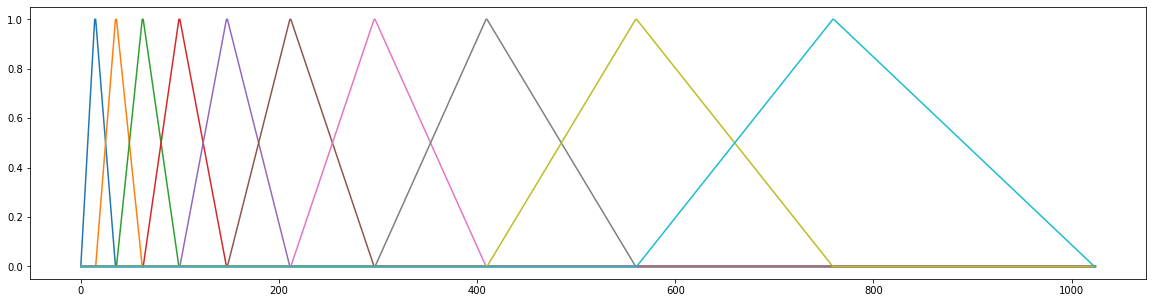

In [ ]:
filters = get_filters(filter_points, FFT_size)

plt.figure(figsize=(20, 5))
for n in range(filters.shape[0]):
    plt.plot(filters[n])

Selanjutnya saya membagi bobot MEL segitiga dengan lebar pita MEL (normalisasi area). Jika saya tidak menormalkan filter, saya akan melihat noise meningkat dengan frekuensi karena lebar filter.

In [ ]:
enorm = 2.0 / (mel_freqs[2:mel_filter_num+2] - mel_freqs[:mel_filter_num])
filters *= enorm[:, np.newaxis]

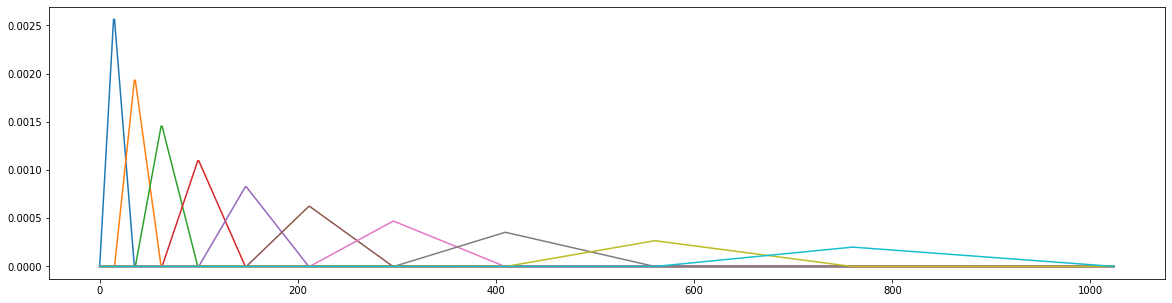

In [ ]:
plt.figure(figsize=(20, 5))
for n in range(filters.shape[0]):
    plt.plot(filters[n])

**Log Energy Computation**

Disini saya menghitung logaritma persegi dari besarnya output bank Mel-filter

In [ ]:
audio_filtered = np.dot(filters, np.transpose(audio_power))
audio_log = 10.0 * np.log10(audio_filtered)
audio_log.shape

(10, 792)

**IDFT**

Rumus:

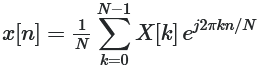

In [ ]:
time_space=np.linspace(0,1.5,1500)
x=3*np.cos(2*np.pi*20*time_space+0.2)+np.cos(2*np.pi*30*time_space-0.3)+2*np.cos(2*np.pi*40*time_space+2.4)
#print(x)
N=1500
y=np.zeros(N,dtype=np.complex)
freq=np.zeros(N)
#dft
for i in range(1500):
    for j in range(1500):
        y[i]=y[i]+ (x[j]*np.exp(1/2j*np.pi*i*j/1500))     
print(y) 

[  2.42074879+0.00000000e+00j  -7.49308057-9.52692622e+00j
 -17.03304149+7.74376105e-01j ...   2.42454672-3.23164342e-03j
   2.60090262-2.23876306e+00j   0.36516309-2.41494104e+00j]


In [ ]:
#idft
def built():
        
    n=np.arange(1500)
    k=n.reshape((1500,1))
    m=np.exp(1/2j*np.pi*k*n/1500)


    print(1/N*np.dot(m,x)) 
built()
freq=time_space*0.67*1000
print(freq)

ymag=np.abs(y)
anglee=np.angle(y)

[ 0.00161383+0.00000000e+00j -0.00499539-6.35128415e-03j
 -0.01135536+5.16250737e-04j ...  0.00161636-2.15442894e-06j
  0.00173394-1.49250871e-03j  0.00024344-1.60996069e-03j]
[0.00000000e+00 6.70446965e-01 1.34089393e+00 ... 1.00365911e+03
 1.00432955e+03 1.00500000e+03]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


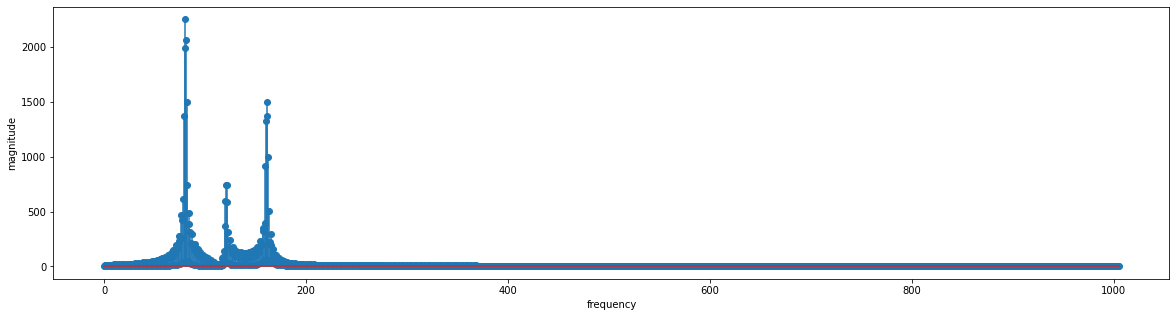

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


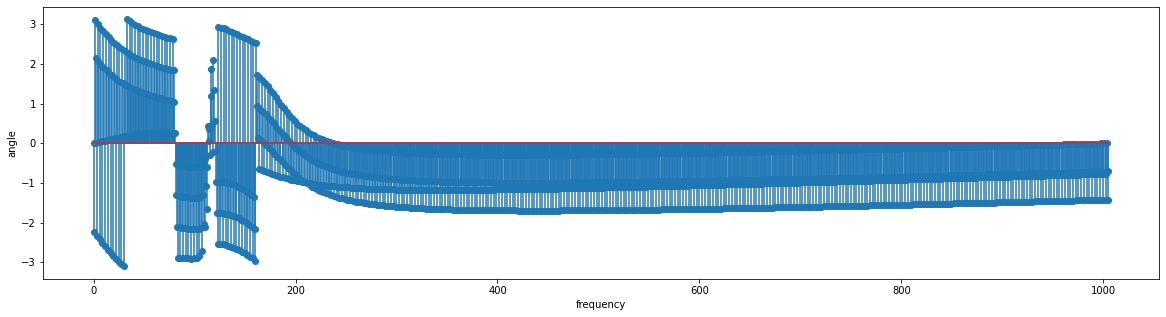

In [ ]:
#magnitude plot
plt.figure(figsize=(20, 5))
plt.stem(freq,ymag)
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.show()    

#phase plot
plt.figure(figsize=(20, 5))
plt.stem(freq,anglee)
plt.xlabel("frequency")
plt.ylabel("angle")
plt.show()

**Generate the Cepstral Coefficents**

Terakhir dalam menghasilkan MFCC adalah dengan menggunakan Discrete Cosine Transform (DCT). Disini saya menggunakan DCT-III. DCT ini akan mengekstrak perubahan frekuensi tinggi dan frekuensi rendah pada sinyal



In [ ]:
def dct(dct_filter_num, filter_len):
    basis = np.empty((dct_filter_num,filter_len))
    basis[0, :] = 1.0 / np.sqrt(filter_len)
    
    samples = np.arange(1, 2 * filter_len, 2) * np.pi / (2.0 * filter_len)

    for i in range(1, dct_filter_num):
        basis[i, :] = np.cos(i * samples) * np.sqrt(2.0 / filter_len)
        
    return basis

In [ ]:
dct_filter_num = 40

dct_filters = dct(dct_filter_num, mel_filter_num)

cepstral_coefficents = np.dot(dct_filters, audio_log)
cepstral_coefficents.shape

(40, 792)

**Reviewing Cepstral coefficents**

In [ ]:
cepstral_coefficents[:, 0]

array([-1.26852012e+02,  1.56524943e+01,  1.09823918e+01,  3.06708590e+00,
        4.85404624e+00, -3.38136370e-01, -5.48312932e-01, -1.65815492e+00,
        1.36028965e+00, -2.40154585e-01,  1.86191217e-13,  2.40154585e-01,
       -1.36028965e+00,  1.65815492e+00,  5.48312932e-01,  3.38136370e-01,
       -4.85404624e+00, -3.06708590e+00, -1.09823918e+01, -1.56524943e+01,
        1.79395836e+02, -1.56524943e+01, -1.09823918e+01, -3.06708590e+00,
       -4.85404624e+00,  3.38136370e-01,  5.48312932e-01,  1.65815492e+00,
       -1.36028965e+00,  2.40154585e-01, -2.65725695e-14, -2.40154585e-01,
        1.36028965e+00, -1.65815492e+00, -5.48312932e-01, -3.38136370e-01,
        4.85404624e+00,  3.06708590e+00,  1.09823918e+01,  1.56524943e+01])

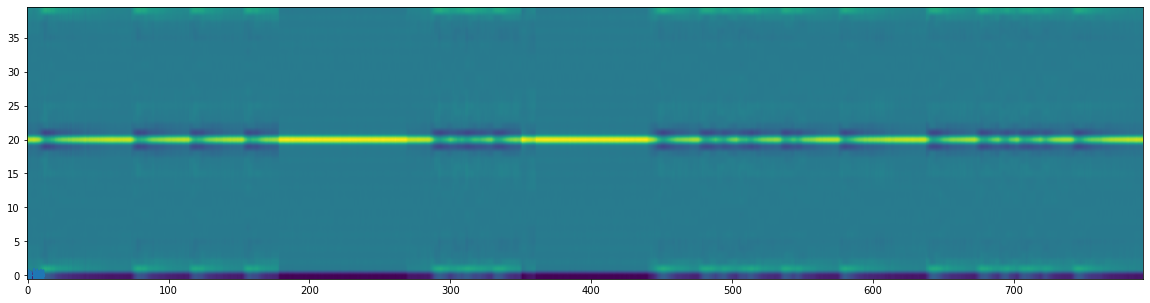

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.imshow(cepstral_coefficents, aspect='auto', origin='lower');